# Linear Regression

In [67]:
import numpy as np
import numpy.random as rnd
import numpy.linalg as nla
import matplotlib.pyplot as plt
%matplotlib inline

**Linear regression** is a supervised method.

\begin{equation}
 f: X \rightarrow y \nonumber
\end{equation}

## Data sets

In what follows we will consider 2 <font color="red"><b>data sets</b></font>:

### Data set I

<font color="red"><b>data set I</b></font> (synthetic) - *univariate*

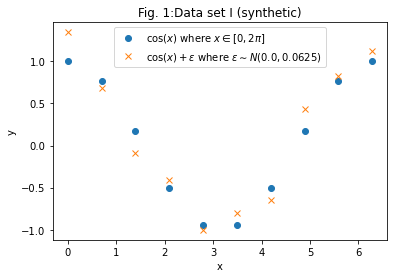

In [68]:
# DATA SET I:               
MEAN=0.0
SD=0.25 # Sigma^2=0.0625
SZ=10
START=0.0
END=2.0*np.pi
x=np.linspace(START, END, num=SZ)
rnd.seed(seed=2505) # To make data reproducible
noise=rnd.normal(loc=MEAN, scale=SD, size=SZ)
y1=np.cos(x) 
y=y1 + noise

plt.plot(x,y1,'o',label=r'$\cos(x)$ where $x \in [0,2\pi]$')
plt.plot(x,y,'x',label=r'$\cos(x)+\epsilon$ where $ \epsilon \sim N(0.0,0.0625)$ ')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title(r'Fig. 1:Data set I (synthetic)')
plt.show()

# Extra points from the same analytical set (for subsequent tests)
SZ2=10000
x2 = np.linspace(START, END, num=SZ2)
rnd.seed(seed=27)
noise2=rnd.normal(loc=MEAN, scale=SD, size=SZ2)
y2=np.cos(x2) + noise2

NUM_TEST2=20
ind_test = sorted(rnd.choice(np.arange(SZ2), NUM_TEST2, replace=False ))
x_test = x2[ind_test]
y_test = y2[ind_test]

### Data set II

<font color="red"><b>data set II</b></font> (diabetes) - *multivariate* <br>
Originally published in the following article:<br>
**Least Angle Regression** (LARS),
*Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani*,<br>
*The Annals of Statistics, 2004, Vol. 32, 2, p. 407-499*.

## Optimization of a given model

Let's consider the following linear model:
\begin{eqnarray}
 Y_j & = & \sum_{i=0}^n X_{ji} \, \beta_i \, + \, \epsilon_j \nonumber 
\end{eqnarray}

or in matrix form:
\begin{eqnarray}
 Y   & = & X\, \beta \, + \, \epsilon \nonumber 
\end{eqnarray}
where $X$ (design matrix) is an $n \times p$ matrix.
(In what follows, we assume that $n \ge p$).

This model can be optimized in several ways, e.g.:
* Least Squares Regression (LSQ)
* Gradient Descent
* Maximum Likelihood Estimation (MLE)

### Least Squares method (LSQ)

The LSQ approach does **not** require information on the data points' underlying distribution.<br>
Mathematically $\beta$ can be estimated by minimizing the following $L^2$ norm:
\begin{eqnarray}
   L(\beta) & = &  \lVert Y - X\beta \rVert^2 \label{L2norm}
\end{eqnarray}

Thus, taking the matrix derivative $\frac{\partial L}{\partial \beta}$ leads to the so-called "normal" equations:
\begin{eqnarray}
 X^T \, X \,\widehat{\beta}& = & X^T\,Y \nonumber
\end{eqnarray}

If the regression/design matrix $X$ has rank $p$, then the matrix $X^TX$ is positive-definite and 
thus non-singular.

The estimate for $\beta$ i.e. $\widehat{\beta}$ is **unique** and thus given by:
\begin{eqnarray}
   \widehat{\beta} & = & (X^TX)^{-1}\,X^T \,Y \nonumber
\end{eqnarray}

The fitted values $\widehat{Y}$ are given by:
\begin{eqnarray}
   \widehat{Y} & = & X \,  \widehat{\beta} \nonumber
\end{eqnarray}

The residuals $e$ are given by:
\begin{eqnarray}
   e & = & Y\, - \, \widehat{Y}  \nonumber \\
     & = & Y\, - \, X \,  \widehat{\beta} \nonumber
\end{eqnarray}

The **residual sums of squares** (RSS) is thus:
\begin{eqnarray}
   e^T\,e &= & Y^TY \, - \, \widehat{\beta}^T  X^T X \widehat{\beta} \nonumber
\end{eqnarray}

The **mean square error** (MSE) is then given by:
\begin{eqnarray}
    \mathrm{MSE} & = & \frac{\mathrm{RSS}}{n} \nonumber
\end{eqnarray}

In [69]:
def genXmat(x,orderPoly,hasIntercept=True):
    """
    Create X matrix based on:
      orderPoly:: order of the polynomial
      hasIntercept :: presence of Intercept
    """
    start=0
    if hasIntercept==False:
        start=1
    return x[:,np.newaxis]**np.arange(start, orderPoly+1)

def calcBetaHat(Xmat,Y):
    """
    Calculate BetaHat
    """
    return nla.inv(Xmat.T @ Xmat) @ Xmat.T @ Y

def calcYHat(Xmat,BetaHat):
    """regression
    Calculate YHat
    """
    return Xmat @ BetaHat

def calcResid(Y,YHat):
    """regression
    Calculate Residual
    """
    return Y - YHat

In [108]:
MAXORDER = x.shape[0]
lstIorder, lstRSS = [], []
lstBetaHat, lstYHat = [], []
for iorder in range(1, MAXORDER):
    
    Xmat = genXmat(x,iorder)
    BetaHat = calcBetaHat(Xmat,y)
    YHat = calcYHat(Xmat,BetaHat)
    Res = calcResid(y,YHat)
    RSS = np.sum(Res * Res)
    # Accumulate data
    lstIorder.append(iorder)
    lstBetaHat.append(BetaHat)
    lstYHat.append(YHat)
    lstRSS.append(RSS)

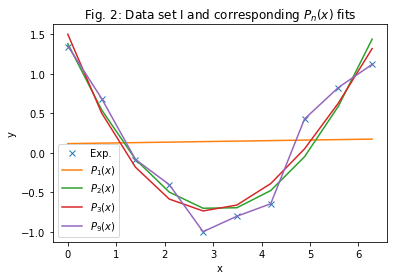

In [109]:
plt.title('Fig. 2: Data set I and corresponding ' + r'$P_n(x)$' + ' fits')
plt.plot(x, y, 'x', label=r'Exp.')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, lstYHat[0], label=r'$P_1(x)$')
plt.plot(x, lstYHat[1], label=r'$P_2(x)$')
plt.plot(x, lstYHat[2], label=r'$P_3(x)$')
plt.plot(x, lstYHat[8], label=r'$P_9(x)$')
plt.legend()
plt.show()

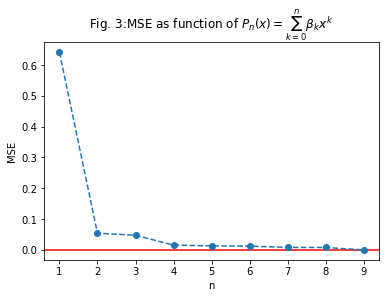

In [72]:
plt.axhline(y=0.0, color='r',linestyle='-')
plt.title('Fig. 3:MSE as function of ' + r'$P_n(x)=\sum_{k=0}^n \beta_k x^k$')
plt.xlabel('n')
plt.ylabel('MSE')
plt.plot(np.array(lstIorder), np.array(lstRSS)/x.shape[0],'o--')
plt.show()

#### Ex.: $P_3(x)$ polynomial fit (LSQ) for data set I 


The cubic approximation is given by:
\begin{eqnarray}
 P_3(x) &:= & \displaystyle \sum_{k=0}^3 x^k \, \beta_k  \nonumber \\
        & = &\beta_0 \, + \, x \, \beta_1  \, + \, x^2 \, \beta_2 \, + \, x^3 \, \beta_3  \nonumber
\end{eqnarray} 


In [110]:
print(f"Numerical values (data set I)::")
for i, item in enumerate(lstBetaHat[2]):
    print(f"  Beta_{i}: {item:12.8f}")
print(f"RSS:{lstRSS[2]:10.8f}")    

Numerical values (data set I)::
  Beta_0:   1.50131612
  Beta_1:  -1.66363662
  Beta_2:   0.34779480
  Beta_3:  -0.01394542
RSS:0.47502225


### Gradient Descent (GD)

The estimate for $\beta$ can also be found by applying the gradient descent 
method on the $L^2$ norm given by Eq.\,\ref{L2norm}.

\begin{eqnarray}
 L(\beta) & =  & f(\beta) & = &\lVert Y - X\beta \rVert^2 \nonumber \\
          &    &          & = & (Y - X \beta)^T \,(Y - X \beta) \nonumber \\
          &    &          & = & Y^TY -Y^TX \beta - \beta^TX^TY + \beta^TX^TX \beta \\
\end{eqnarray}

The gradient w.r.t $\beta$ is therefore given by:
\begin{eqnarray}
 \nabla_{\beta} L(\beta) &= & g(\beta) & = & 2 \,( X^T X \beta -X^T\,Y) \nonumber \\ 
                         &  &             & = & 2\,X^T\,( X \beta - Y)
\end{eqnarray}

#### Gradient Descent Algorithm (using backtrace)

* Initialization:
  * Choose $\beta_{0}$ 
  * Set a threshold $\epsilon$
* While ($\lVert g(\beta) \rVert >\epsilon$) && ($k \leq k_{max}$) 
  * Choose $d_k$
  * Select $t_k$ | $f(\beta_k + t_kd_k) < f(\beta_k)$
  * $\beta_{k+1} =  \beta_{k} + t_k d_k$
  * $k=k+1$
  
The backtracking approach requires 3 parameters: $s,a,b$
where: 
* $s>0$ 
* $a,b \in (0,1)$.

In [74]:
def f(y, Xmat, beta):
    """
    f(beta) := |y-Xmat beta|^2
    """
    z = y - Xmat @ beta
    return np.dot(z,z)

def g(y, Xmat, beta):
    """
    g = f'(beta) = -2 Xmat^T.y + 2 Xmat^T. Xmat beta
    """
    return 2.0 *Xmat.T @ (Xmat @ beta -  y)

In [75]:
def gradDescBackTrace(f, g, y, Xmat ,xo, s, a, b , CONV=1.0E-4 , NITERMAX=100000):
    """
    Gradient Descent with Backtrace
        f          : Function to be optimized
        g          : Gradient vector of f
        y, A, x0   : Arguments for f and g
        
        s          : s-coeff for BT (also known as the learning rate)
        a          : a-coeff for BT
        b          : b-coeff for BT
        CONV       : Convergence Threshold of the Gradient (Default: 1.0E-5)
        NITERMAX   : Max. #Iterations (Default: 100000)
    Return
        isConverged: Convergence of the simulation
        xs         : Last coord.
        arrGradNorm   : Array of grad. norm
    """
    arrGradNorm=[]
    isConverged=False
    xs = xo
    niter = 0
    grad = g(y,A,xs)
    arrGradNorm.append(nla.norm(grad))
    fval = f(y,A,xs)
    print(f"    beta           :[{' '.join([ f'{item:>16.8E}' for item in xs])}]")
    print(f"    s              :{s:8.4f}")
    print(f"    a              :{a:8.4f}")
    print(f"    b              :{b:8.4f}")
    print(f"    Conv. threshold:{CONV:8.2E}")
    print(f"    Max. #Iter     :{NITERMAX:8d}\n")  
    
    while (nla.norm(grad) > CONV) and (niter<NITERMAX):

        # Find ideal step for backtrace
        t = s
        while (fval - f(y,A,xs - t*grad)) < a*t*nla.norm(grad)**2 :
              t = b*t

        # Normal Gradient Descent 
        xs = xs - t *grad
        grad = g(y,A,xs)
        arrGradNorm.append(nla.norm(grad))
        fval = f(y,A,xs)
        niter += 1
        
    if nla.norm(grad) <= CONV:
        isConverged=True
        print(f"    => CONVERGED at iter:{niter}!")
    return isConverged, xs, arrGradNorm

#### Ex.: $P_3(x)$ polynomial fit (GD) for data set I

In [76]:
A = genXmat(x,3)
xo = np.zeros(4)
isConverged, coord, arrGradNorm = \
gradDescBackTrace(f, g, y, A, xo, 1.0, 0.5, 0.5, CONV=1.0E-4, NITERMAX=1000000)

    beta           :[  0.00000000E+00   0.00000000E+00   0.00000000E+00   0.00000000E+00]
    s              :  1.0000
    a              :  0.5000
    b              :  0.5000
    Conv. threshold:1.00E-04
    Max. #Iter     : 1000000

    => CONVERGED at iter:400372!


In [111]:
if isConverged==True:
    print(f"Numerical values (data set I)::")
    for i, item in enumerate(coord):
        print(f"  Beta_{i}   :{item:12.8f}")
    print(f"  |g(beta)|:{arrGradNorm[-1]:12.8f}")

Numerical values (data set I)::
  Beta_0   :  1.50125513
  Beta_1   : -1.66353385
  Beta_2   :  0.34775829
  Beta_3   : -0.01394190
  |g(beta)|:  0.00009992


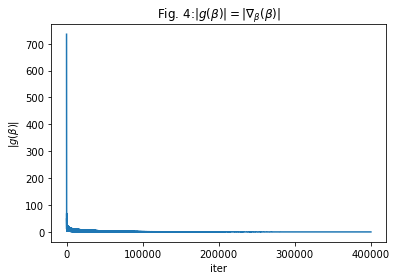

In [78]:
plt.plot(arrGradNorm)
plt.title('Fig. 4:' + r'$|g(\beta)|=|\nabla_{\beta}(\beta)|$')
plt.xlabel('iter')
plt.ylabel(r'$|g(\beta)|$')
plt.xticks(np.arange(0,450000,step=100000))
plt.show()

## Underfitting, overfitting and the optimal model for data set I

In Fig. 3, $\mathrm{MSE}=0$ when the $P_9(x)$ fit is used for data set I: 
<font color="red"><b>we have a perfect fit 
    for the data provided</b></font>.<br> 
This does **not** mean that the $P_9(x)$ fit is necessary the best model to predict the outcome of **new** data points.<br> 
This phenomenon is known as **overfitting**.

The data belonging to data set I are neither well fit by $P_1(x)$.<br>
The phenomenon associated to $P_1(x)$ is known as **underfitting**. 

In [112]:
MAXORDER = x.shape[0]
lstRSSTest = []
for iorder in range(1,MAXORDER):
    Xmat = genXmat(x_test,iorder)
    YHat = calcYHat(Xmat,lstBetaHat[iorder-1])
    res = y_test - YHat
    lstRSSTest.append(np.sum(res*res))
print(f"  Best Polynomial fit (for new data points):{np.argmin(lstRSSTest)+1}")

  Best Polynomial fit (for new data):5


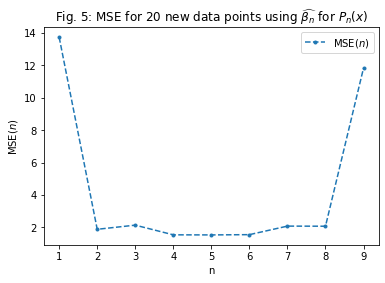

In [107]:
plt.title('Fig. 5: MSE for 20 new data points using ' + r'$\widehat{\beta_n}$' + ' for '  r'$P_n(x)$')
plt.plot(range(1,MAXORDER), lstRSSTest, '.--', label=r'$\mathrm{MSE}(n)$')
plt.xlabel('n')
plt.ylabel(r'$\mathrm{MSE}(n)$')
plt.legend()
plt.show()

### Conclusion 

From the plot in Fig. 5 (MSE as function of the polynomial order), we can conclude that the polynomial $P_5(x)$ is the best fit for new data points.

## Dataset II (Diabetes) and the use of scikit-learn 

Dataset II (diabetes) is to be retrieved from the *scikit-learn* package. 

In [ ]:
import numpy as np
import sklearn as sk
import sklearn.datasets as skdata
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

### Load the dataset

In [ ]:
diabetes = skdata.load_diabetes(as_frame=False)
print(f"  Diabetes keys:\n{diabetes.keys()}")
X = diabetes['data']
y = diabetes['target']

The diabetes data set has $10$ predictor variables ("features") and $1$ response variable ("target").

In [ ]:
print(f"  Features:")
for i, item in enumerate(diabetes['feature_names']):
    print(f"  #{i+1:2d}  '{item}'")   

### Split the data set

The data set (X,y) will be split into 2 parts:
* a training set i.e. X_train, y_train
* a test set i.e. X_test, y_test

i.e.:
* X = X_train $\cup$ X_test
* y = y_train $\cup$ y_test

The test set will be used to cross-validate the model.
In the example we decided to split the data set in the following way:
* the data entries are randomly selected (but with a fixed seed for reproducibility)
* the training set takes 75% of the entries; the test set the remaining 25%

In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.25, random_state=2505)
for item in (X_train, y_train, X_test, y_test):
    print(f"   dim:{item.shape}")

### Create the linear regression model

In [ ]:
lm = linear_model.LinearRegression()

### Train the model

We can train the model: 
\begin{eqnarray}
    y_i & = & \displaystyle \beta_0 \,+\,\sum_{k=1}^{n=10} x_{ik}\, \beta_k \nonumber \\
      Y & = & X \, \beta \label{LinModel} 
\end{eqnarray}
using the training sets X_train and y_train

In [ ]:
lm.fit(X_train, y_train)
print(f"  Intercept (Beta_0):{lm.intercept_:12.6f}")
for i, item in enumerate(lm.coef_) :
    print(f"  Beta_{i+1:2d}: {item:12.6f}")    

### Test the accuracy of the above model

The sets X_test and y_test are now used to test the model as specified by Eq. \ref{LinModel}.

The $\mathrm{SSE}$ (Sum Squares Error) is given by:
\begin{eqnarray}
    \mathrm{SSE} & = & \displaystyle \sum_{i=1}^n 
      \Bigg( y_i \, -\,\Big [\widehat{\beta_0}\,+\,\sum_{k=1}^{10} x_{ik}\,\widehat{\beta_k} \Big ] \Bigg)^2 \nonumber
\end{eqnarray}
  
where $y_i\in$ y\_test; and $x_i  \in$ X\_test. 
      
The $\mathrm{MSE}$ (Mean Squares Error) is thus given by:
\begin{eqnarray}
      \mathrm{MSE}           & = & \frac{\mathrm{SSE}}{n} \nonumber
\end{eqnarray}

The $\mathrm{SST}$ is given by:
\begin{eqnarray}
    \mathrm{SST} & = & \displaystyle \sum_{i=1}^n \Bigg ( y_i \, - \, \overline{y} \Bigg)^2 \nonumber
\end{eqnarray} 

$R^2$ is defined as:
\begin{eqnarray}
    \mathrm{R}^2 & = & 1 - \frac{\mathrm{SSE}}{\mathrm{SST}} \nonumber
\end{eqnarray}    

In [ ]:
z = y_test - y_pred
SSE = np.sum(z**2)
print(f"MSE (using sk):{mean_squared_error(y_test, y_pred):12.6f}")
print(f" or (manually):{1/len(z)*SSE:12.6f}")

av = np.mean(y_test)
SST = np.sum((y_test -av)**2)
print(f"R2 (using sk)   :{r2_score(y_test,y_pred):8.4f}")
print(f"   or (manually):{1- SSE/SST:8.4f}")

## How to improve the above model?

The value of R$^2$ is not great (to put it mildly). How can we improve the model? 
What is the real functional dependence of y on each of the predictors? Can we reduce the
number of predictor variables?

<p>The use of some statistical techniques should really do it. To be continued...</p>
